### Econ 176 APIs Day 2

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [ ]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [ ]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'iss_position': {'longitude': '-170.2459', 'latitude': '3.6723'}, 'timestamp': 1738864593, 'message': 'success'}


In [ ]:
#
# Let's remind ourselves how dictionaries work:

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)

lat:  3.6723


Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

In [ ]:
from math import *
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2

    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [ ]:
#
# Let's make sure we "unpack the process" w/o AI
#


In [ ]:
#
# Then, let's compare with AI's result...
#

Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [ ]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [ ]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Econ176_Participant_6 Guangsu"},
{"craft": "Tiangong", "name": "Econ176_Participant_6 Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

In [ ]:
d['people']

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=1&y=3"    # perhaps try from browser first!
result_ft = requests.get(url)
# print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d

We can create larger custom API calls, as well...

For example,

In [ ]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result_ft.json()                  # try .text, as well...
print(f"The resulting data is {d}")

The resulting data is {'Number': 176, 'Initials': ['AC', 'AL', 'AN', 'AP', 'AZ', 'CL', 'CM', 'CW', 'CZ', 'DS', 'EC', 'ED', 'EG', 'ES', 'HV', 'IC', 'IG', 'JB', 'JN', 'JT', 'KR', 'LA', 'LG', 'LS', 'LW', 'MD', 'ND', 'NM', 'NV', 'NW', 'OB', 'RK', 'RL', 'RP', 'SB', 'SC', 'SD', 'SF', 'SS', 'TC', 'TS', 'VN', 'VVP', 'YM', 'ZD', 'ZY'], 'Departments': ['Econ', 'CS']}


**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [ ]:
#
# see if you can extract only your initials from d
d

# we're not finished yet! :)

<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%)</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Let's start!

In [1]:
#
# Let's request!   Just using the demo, for now:

import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo"    # demo version
result = requests.get(url)
result

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result.json()                       # probably _don't_ try .text here!
print(f"The resulting data's keys are {list(d.keys())}")

The resulting data's keys are ['Meta Data', 'Time Series (Daily)']


In [ ]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

In [ ]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

In [ ]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

In [ ]:
# Oooh... Now let's see what's in each key (date)

d['Time Series (Daily)']['2025-01-21']  # Aha! it's a dictionary again!  We will need to index again!!

{'1. open': '430.2000',
 '2. high': '430.8999',
 '3. low': '425.5950',
 '4. close': '428.5000',
 '5. volume': '26085703'}

In [ ]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [ ]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    closing =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if closing < min_price:
        min_price = close
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

min_price_date is 2024-10-01 and min_price = 427.0


#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

In [31]:
# Request using my API key MTWVU7GBVGXVXNPB
# Microsoft Inc. Stock analysis
import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=MTWVU7GBVGXVXNPB"
result = requests.get(url)
result

<Response [200]>

In [32]:
#
# Let's view ... then parse and interpret!

d = result.json()
print(f"The resulting data's keys are {list(d.keys())}")

The resulting data's keys are ['Meta Data', 'Time Series (Daily)']


In [33]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

2025-02-21
2025-02-20
2025-02-19
2025-02-18
2025-02-14
2025-02-13
2025-02-12
2025-02-11
2025-02-10
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10

In [34]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

['2025-02-21',
 '2025-02-20',
 '2025-02-19',
 '2025-02-18',
 '2025-02-14',
 '2025-02-13',
 '2025-02-12',
 '2025-02-11',
 '2025-02-10',
 '2025-02-07',
 '2025-02-06',
 '2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-

In [35]:
#
# Let's flip the DATES around to start in ascending order:
DATES.reverse()
DATES

# Yay!

['2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-19',
 '2024-12-20',
 '2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-30',
 '2024-12-31',
 '2025-01-

In [36]:
# Oooh... Now let's see what's in each key (date)

d['Time Series (Daily)']['2025-01-21']  # Aha! it's a dictionary again!  We will need to index again!!

{'1. open': '430.2000',
 '2. high': '430.8999',
 '3. low': '425.5950',
 '4. close': '428.5000',
 '5. volume': '26085703'}

In [37]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [38]:
# Extract the closing price of the 100 Dates extracted.
close_price = []
for date in DATES:
    close = get_closing(date, d)
    close_price.append(close)

close_price

[428.02,
 430.3,
 420.69,
 417.13,
 416.54,
 416.06,
 409.54,
 414.71,
 417.46,
 415.84,
 416.32,
 419.14,
 418.74,
 416.12,
 416.72,
 418.16,
 418.78,
 427.51,
 424.6,
 424.73,
 428.15,
 426.59,
 431.95,
 432.53,
 406.35,
 410.37,
 408.46,
 411.46,
 420.18,
 425.43,
 422.54,
 418.01,
 423.03,
 425.2,
 426.89,
 415.0,
 415.76,
 417.79,
 415.49,
 412.87,
 417.0,
 418.79,
 427.99,
 422.99,
 423.46,
 430.98,
 431.2,
 437.42,
 442.62,
 443.57,
 446.02,
 443.33,
 448.99,
 449.56,
 447.27,
 451.59,
 454.46,
 437.39,
 437.03,
 436.6,
 435.25,
 439.33,
 438.11,
 430.53,
 424.83,
 421.5,
 418.58,
 423.35,
 427.85,
 422.37,
 424.56,
 418.95,
 417.19,
 415.67,
 426.31,
 424.58,
 429.03,
 428.5,
 446.2,
 446.71,
 444.06,
 434.56,
 447.2,
 442.33,
 414.99,
 415.06,
 410.92,
 412.37,
 413.29,
 415.82,
 409.75,
 412.22,
 411.44,
 409.04,
 410.54,
 408.43,
 409.64,
 414.77,
 416.13,
 408.21]

In [39]:
# Find Maximum and minimum closing prices and their respective dates
max_price = max(close_price)
min_price = min(close_price)

max_date = DATES[close_price.index(max_price)]
min_date = DATES[close_price.index(min_price)]

print(f"*Maximum closing price: {max_price} on {max_date}\n*Minimum closing price: {min_price} on {min_date}")

*Maximum closing price: 454.46 on 2024-12-17
*Minimum closing price: 406.35 on 2024-10-31


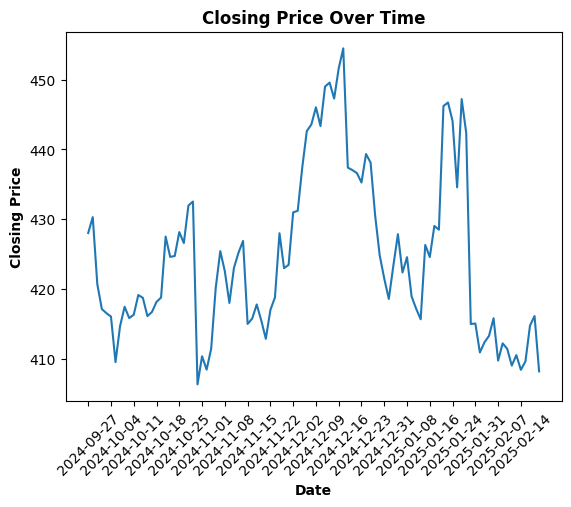

In [40]:
# Graph of closing prices over time
import matplotlib.pyplot as plt

plt.plot(DATES, close_price)
plt.xticks(ticks=DATES[::5], rotation=45)  # Minimize clustered dates on x-axis
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.title('Closing Price Over Time', fontweight='bold')
plt.show()

In [41]:
# Function for Single-Share Analysis
def single_share_analysis(prices):
    min_price, max_profit, buy_date, sell_date = float('inf'), 0, None, None

    for date, price in enumerate(prices):
        if price < min_price:
            min_price = price
            buy_date  = DATES[close_price.index(min_price)]

        if price - min_price > max_profit:
            max_profit = price - min_price
            sell_date = DATES[close_price.index(price)]

    return buy_date, sell_date, max_profit


In [42]:
# Check Single-Share Analysis:
buy_date, sell_date, max_profit = single_share_analysis(close_price)
print(f'The maximum profit achieved is: {max_profit}; by buying on: {buy_date} and selling on: {sell_date}')


The maximum profit achieved is: 48.10999999999996; by buying on: 2024-10-31 and selling on: 2024-12-17


In [43]:
# Find buy date and sell date indices
buy_idx = DATES.index(buy_date)
sell_idx = DATES.index(sell_date)

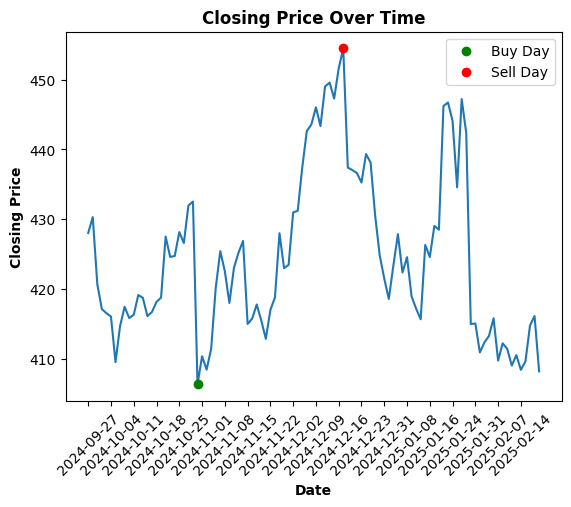

In [44]:
plt.plot(DATES, close_price)
plt.scatter(buy_idx, close_price[buy_idx], color='green', label='Buy Day', zorder=5)
plt.scatter(sell_idx, close_price[sell_idx], color='red', label='Sell Day', zorder=5)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xticks(ticks=DATES[::5], rotation=45)  # Minimize clustered dates on x-axis
plt.title('Closing Price Over Time', fontweight='bold')
plt.legend()
plt.show()

#### Part 2

In [45]:
# Request using my API key MTWVU7GBVGXVXNPB
# Apple Inc. Stock analysis
import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=MTWVU7GBVGXVXNPB"
result = requests.get(url)
result

<Response [200]>

In [46]:
#
# Let's view ... then parse and interpret!

d = result.json()
print(f"The resulting data's keys are {list(d.keys())}")

The resulting data's keys are ['Meta Data', 'Time Series (Daily)']


In [47]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

2025-02-21
2025-02-20
2025-02-19
2025-02-18
2025-02-14
2025-02-13
2025-02-12
2025-02-11
2025-02-10
2025-02-07
2025-02-06
2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10

In [48]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

['2025-02-21',
 '2025-02-20',
 '2025-02-19',
 '2025-02-18',
 '2025-02-14',
 '2025-02-13',
 '2025-02-12',
 '2025-02-11',
 '2025-02-10',
 '2025-02-07',
 '2025-02-06',
 '2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-

In [49]:
#
# Let's flip the DATES around to start in ascending order:
DATES.reverse()
DATES

# Yay!

['2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-16',
 '2024-12-17',
 '2024-12-18',
 '2024-12-19',
 '2024-12-20',
 '2024-12-23',
 '2024-12-24',
 '2024-12-26',
 '2024-12-27',
 '2024-12-30',
 '2024-12-31',
 '2025-01-

In [50]:
# Oooh... Now let's see what's in each key (date)

d['Time Series (Daily)']['2025-01-21']  # Aha! it's a dictionary again!  We will need to index again!!

{'1. open': '224.0000',
 '2. high': '224.4200',
 '3. low': '219.3800',
 '4. close': '222.6400',
 '5. volume': '98070429'}

In [51]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [52]:
# Extract the closing price of the 100 Dates extracted.
close_price = []
for date in DATES:
    close = get_closing(date, d)
    close_price.append(close)

close_price

[227.79,
 233.0,
 226.21,
 226.78,
 225.67,
 226.8,
 221.69,
 225.77,
 229.54,
 229.04,
 227.55,
 231.3,
 233.85,
 231.78,
 232.15,
 235.0,
 236.48,
 235.86,
 230.76,
 230.57,
 231.41,
 233.4,
 233.67,
 230.1,
 225.91,
 222.91,
 222.01,
 223.45,
 222.72,
 227.48,
 226.96,
 224.23,
 224.23,
 225.12,
 228.22,
 225.0,
 228.02,
 228.28,
 229.0,
 228.52,
 229.87,
 232.87,
 235.06,
 234.93,
 237.33,
 239.59,
 242.65,
 243.01,
 243.04,
 242.84,
 246.75,
 247.77,
 246.49,
 247.96,
 248.13,
 251.04,
 253.48,
 248.05,
 249.79,
 254.49,
 255.27,
 258.2,
 259.02,
 255.59,
 252.2,
 250.42,
 243.85,
 243.36,
 245.0,
 242.21,
 242.7,
 236.85,
 234.4,
 233.28,
 237.87,
 228.26,
 229.98,
 222.64,
 223.83,
 223.66,
 222.78,
 229.86,
 238.26,
 239.36,
 237.59,
 236.0,
 228.01,
 232.8,
 232.47,
 233.22,
 227.63,
 227.65,
 232.62,
 236.87,
 241.53,
 244.6,
 244.47,
 244.87,
 245.83,
 245.55]

In [53]:
# Find Maximum and minimum closing prices and their respective dates
max_price = max(close_price)
min_price = min(close_price)

max_date = DATES[close_price.index(max_price)]
min_date = DATES[close_price.index(min_price)]

print(f"*Maximum closing price: {max_price} on {max_date}\n*Minimum closing price: {min_price} on {min_date}")

*Maximum closing price: 259.02 on 2024-12-26
*Minimum closing price: 221.69 on 2024-10-07


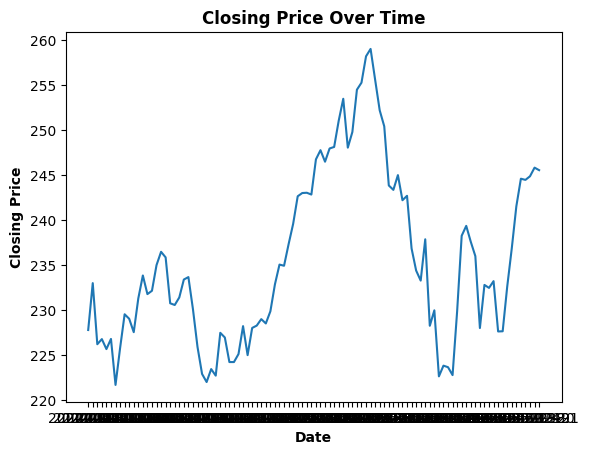

In [54]:
# Graph of closing prices over time
import matplotlib.pyplot as plt

plt.plot(DATES, close_price)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.title('Closing Price Over Time', fontweight='bold')
plt.show()

In [55]:
# Function for Single-Share Analysis
def single_share_analysis(prices):
    min_price, max_profit, buy_date, sell_date = float('inf'), 0, None, None

    for date, price in enumerate(prices):
        if price < min_price:
            min_price = price
            buy_date  = DATES[close_price.index(min_price)]

        if price - min_price > max_profit:
            max_profit = price - min_price
            sell_date = DATES[close_price.index(price)]

    return buy_date, sell_date, max_profit


In [56]:
# Check Single-Share Analysis:
buy_date, sell_date, max_profit = single_share_analysis(close_price)
print(f'The maximum profit achieved is: {max_profit}; by buying on: {buy_date} and selling on: {sell_date}')


The maximum profit achieved is: 37.329999999999984; by buying on: 2024-10-07 and selling on: 2024-12-26


In [57]:
# Find buy date and sell date indices
buy_idx = DATES.index(buy_date)
sell_idx = DATES.index(sell_date)

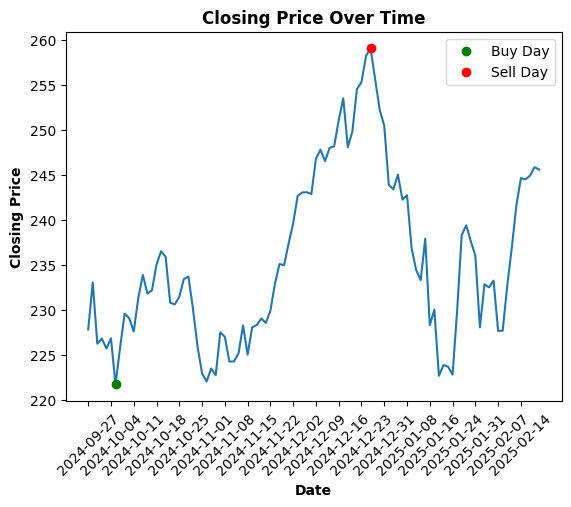

In [58]:
plt.plot(DATES, close_price)
plt.scatter(buy_idx, close_price[buy_idx], color='green', label='Buy Day', zorder=5)
plt.scatter(sell_idx, close_price[sell_idx], color='red', label='Sell Day', zorder=5)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xticks(ticks=DATES[::5], rotation=45)  # Minimize clustered dates on x-axis
plt.title('Closing Price Over Time', fontweight='bold')
plt.legend()
plt.show()

<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


<hr>
I analyzed Microsoft and apple stocks. I realized for single-share, Microsoft offers better profit at an average of **48.11** compared to Apple's **37.33**

<br>

I choose a cryptocurrency API but it was a limited one. I was excited to use it because it offers a different perspective from stock trackers because this time I'm only tracking a ratio of an asset in relation to a real currency such as the dollar. It's access was limited hence why I opted to go for apple. There are other financial markets I had an idea of trying as well such as Forex trading, or Futures in relation to gold, silve, or Oil. Unfortunately their intraday data was limited therefore I couldn't use them fully. But it would have been nice to compare assets from different makets as well.

I used different AI options and they were all helpful. I was amazed by how the chat AI in google collabs is able to properly understand indoc comments and create a relevant command line with ease. I used chatGPT to help me declutter my x-axis since it looked really bad as it tried to show all 100 dates available.

I had knowledge on the use of API's but never in the context of data science and analysis. This was a really cool excercise.
<hr>

### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:

Feel free to use this cell for that reflection...

<hr>
It was really cool. We need more and more excercises!!!
<br>
<br>
<br>
<br>

<hr>

<br>


### Submitting...

This "API + Analysis" challenge will be due:
+ Thursday evening @ 11pm  (Feb. 13th)
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!